In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(style='ticks', palette='pastel')

In [2]:
df = pd.read_pickle('pre_commit_df.pkl')
df['total_hooks'] = df['local_hooks'] + df['remote_hooks']

In [3]:
df.head()

,default_install_hook_types_count,default_language_version_count,default_stages_count,exclude_count,fail_fast_count,files_count,minimum_pre_commit_version_count,repos_count,local_hooks,local_hooks_raw,remote_repoes,remote_hooks,remote_hooks_raw,is_valid,raw_yaml,total_hooks
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,[],[],[https://github.com/ambv/black],[black],"[{'id': 'black', 'language_version': 'python'}]",True,{'repos': [{'repo': 'https://github.com/ambv/b...,[black]
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,[],[],[https://github.com/ambv/black],[black],[{'id': 'black'}],True,{'default_language_version': {'python': 'pytho...,[black]
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,[],[],[https://github.com/commitizen-tools/commitizen],[commitizen],"[{'id': 'commitizen', 'stages': ['commit-msg']}]",True,"{'repos': [{'hooks': [{'id': 'commitizen', 'st...",[commitizen]
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,[],[],[https://github.com/pre-commit/pre-commit-hooks],[trailing-whitespace],[{'id': 'trailing-whitespace'}],True,{'repos': [{'repo': 'https://github.com/pre-co...,[trailing-whitespace]
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN


# Goal

To investigate trends in pre-commit hooks.

# Invalid yamls

89.05% of the yamls are valid pre-commit files. I will focus the rest of the analysis on only valid yamls.

In [4]:
df[df['is_valid']].shape[0]/df.shape[0]

0.8905664006154438

In [5]:
df = df[df['is_valid']]

# Explore the statisitcs of each top level pre-commit feature
Those features being: 'repos', 'default_install_hook_types', 'default_language_version', 'default_stages', 'files', 'exclude', 'fail_fast', 'minimum_pre_commit_version'

## default_install_hook_types
From https://pre-commit.com/#top_level-default_install_hook_types: a list of --hook-types which will be used by default when running pre-commit install. This defines when hooks can be run, and the default behavior is that it can be run before a commit (pre-commit). However, git hooks also support other types of hooks like prepare-commit-msg, commit-msg, post-commit, post-checkout, pre-rebase. default_stages and stages further define exactly when a hook should run. If you want a hooke to run at a certain stage, youmust install its respect hook type: if I want to run hooks to run in the commit stage, I must install the pre-commit hook type.

### Results
This appears to be a relatively unused feature of pre-commit hooks. This could partially be due to it being a new feature as well as the default (pre-commit) handling most desired behaviors. Every project atleast use pre-commit. 16 projects choose to more rebust with their hooks. 8 projects used all 9 hooks types support by pre-commit. 

These projects also have (on avg) more hooks used (9.34 vs 5.29) which makes sense as these projects likely have hooks for each hook type, and more hook types logically leads to more hooks.

In [6]:
df['default_install_hook_types_count'].describe()

count    9261.000000
mean        0.009718
std         0.272007
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: default_install_hook_types_count, dtype: float64

<Axes: xlabel='default_install_hook_types_count', ylabel='Count'>

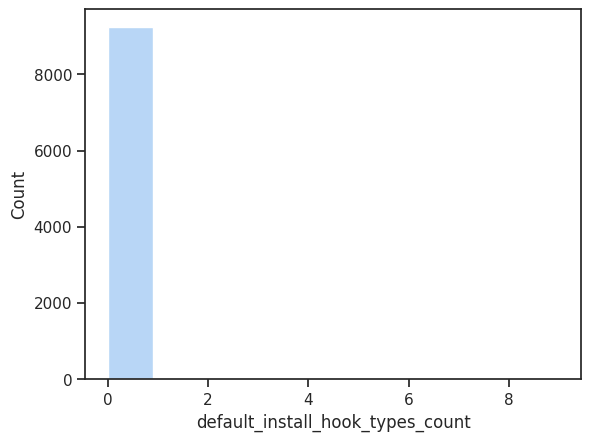

In [7]:
sns.histplot(df.default_install_hook_types_count,binrange=(0,9), bins =10)

In [8]:
for i, (_, y) in enumerate(df[df['default_install_hook_types_count'].fillna(0) > 1].iterrows()):
    print(i, y['raw_yaml']['default_install_hook_types'])
    print('Local hooks',len(y['local_hooks']))
    print('Remote hooks', len(y['remote_hooks']))
    print('Total hooks', len(y['total_hooks']))
    print()

0 ['pre-commit', 'commit-msg']
Local hooks 0
Remote hooks 2
Total hooks 2

1 ['pre-commit', 'commit-msg']
Local hooks 0
Remote hooks 5
Total hooks 5

2 ['pre-commit', 'commit-msg']
Local hooks 0
Remote hooks 2
Total hooks 2

3 ['pre-commit', 'pre-merge-commit', 'pre-push', 'prepare-commit-msg', 'commit-msg', 'post-checkout', 'post-commit', 'post-merge', 'post-rewrite']
Local hooks 0
Remote hooks 13
Total hooks 13

4 ['pre-commit', 'commit-msg']
Local hooks 0
Remote hooks 11
Total hooks 11

5 ['pre-commit', 'pre-merge-commit', 'pre-push', 'prepare-commit-msg', 'commit-msg', 'post-checkout', 'post-commit', 'post-merge', 'post-rewrite']
Local hooks 0
Remote hooks 13
Total hooks 13

6 ['pre-commit', 'pre-merge-commit', 'pre-push', 'prepare-commit-msg', 'commit-msg', 'post-checkout', 'post-commit', 'post-merge', 'post-rewrite']
Local hooks 0
Remote hooks 13
Total hooks 13

7 ['pre-commit', 'pre-merge-commit', 'pre-push', 'prepare-commit-msg', 'commit-msg', 'post-checkout', 'post-commit', 'p

In [9]:
df[df['default_install_hook_types_count'].fillna(0) > 1]['total_hooks'].apply(len).describe()

count    16.00000
mean      9.43750
std       4.84381
min       2.00000
25%       5.00000
50%      12.00000
75%      13.00000
max      15.00000
Name: total_hooks, dtype: float64

In [10]:
df[df['default_install_hook_types_count'].fillna(0) == 0]['total_hooks'].apply(len).describe()

count    9244.000000
mean        5.292081
std         3.980660
min         1.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        24.000000
Name: total_hooks, dtype: float64

## default_language_version

From https://pre-commit.com/#new-hooks: a mapping from language to the default language_version that should be used for that language. This will only override individual hooks that do not set language_version


### Results
This appears to be used almost exclusivly to specifiy the python version. 4.56% (423) of projects us this feature. 3 projects used it to specify the version of something other than python: 2 are 'node', 1 is 'python_env' (which is basically just python).

In [11]:
df['default_language_version_count'].describe()

count    9261.000000
mean        0.045675
std         0.208791
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default_language_version_count, dtype: float64

In [12]:
df[df['default_language_version_count'] != 0].shape

(423, 16)

In [13]:
df[df['default_language_version_count'] != 0].shape[0]/df.shape[0]

0.0456754130223518

In [14]:
for y in df[df['default_language_version_count'] != 0]['raw_yaml']:
    if 'python' not in y['default_language_version']:
        print(y['default_language_version'])

{'node': '14.14.0'}
{'python_venv': 'python3.8'}
{'node': '16.18.0'}


## default_stages
From https://pre-commit.com/#plugins: a configuration-wide default for the stages property of hooks. This will only override individual hooks that do not set stages. A default value for when each hook should run.  

Of note: new in 3.2.0: The values of stages match the hook names. Previously, commit, push, and merge-commit matched pre-commit, pre-push, and pre-merge-commit respectively. 

### Results
Another unsued top level, with only 4.27% (438) projects using it. Of the projects that do use it, they often use it to force hooks to only run during git commit (['commit']).  The 2nd more prevalent use is to have it run on commit and push. Since this defines a default behavior, I believe most projects choose to use staging withing each hook itself.

In [15]:
df['default_stages_count'].describe()

count    9261.000000
mean        0.054854
std         0.260862
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: default_stages_count, dtype: float64

In [16]:
df[df['default_stages_count'] > 0].shape

(438, 16)

In [17]:
df[df['default_stages_count'] > 0].shape[0]/df.shape[0]

0.04729510851959832

In [18]:
for y in df[df['default_stages_count'] != 0]['raw_yaml']:
    # print(y['default_stages'])
    if ['commit'] != y['default_stages']:
        print(y['default_stages'])

['push']
['push']
['push']
['push']
['commit', 'push']
['push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'manual']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['commit', 'push']
['push', 'commit']
['commit', 'push']
['commit', 'push', 'manual']
['commit', 'push']
['commit', 'push', 'manual']
['commit', 'push']
['commit', 'push', 'ma

## files
From https://pre-commit.com/#top_level-default_stages: global file include pattern

### Results
This is pratically never used at 0.4% of projets using it. It seem most projects want hook to be run on everything within the project. There is no real consistent trend in how this include file regex is used. The only commonality I could see was to include .py file.

In [19]:
df['files_count'].describe()

count    9261.000000
mean        0.004103
std         0.063928
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: files_count, dtype: float64

In [20]:
df[ df['files_count'] !=0 ].shape[0]

38

In [21]:
df[ df['files_count'] !=0 ].shape[0]/df.shape[0]

0.004103228593024511

In [22]:
for y in df[df['files_count'] != 0]['raw_yaml']:
    print(y['files'])

^service/
^.*\.twb$
^service/
\.(json|js|ts|jsx|tsx|astro)
^forte/
xvec\/
.py
speakerbox
^(device-types|module-types)/
.py
^apps/
evaluator/.*
^backend/
src\/.*|tests\/.*|\.projenrc.py
Assets/Scripts/.+?\.cs$
^backend/
prologin/.*
.py
src
^src/
(^src/.*py)|(.*yaml)|(^lib/.*py)
.py
^src/
.py
\.(py|yaml|yml)$
src\/.*|tests\/.*|\.projenrc.py
lazy_text_classifiers
^(jadoch/jadoch/|jadoch/bin/)
^src/
.py
(.+\.py|bin\/.+)
/
aicsimageio
.py
^src/
screenpy_requests/.*
(?x)(
    ^pyaedt/|
    _unittest/
)

geopandas\/


## exclude
From https://pre-commit.com/#top_level-files: global file exclude pattern

### Results
Excluding files is a much more common thing for projects to do than including files with 7.94% (736) of projects using it. There is some similar excluse patterns across projects, with the top 10 most common exclude patterns representing almost half of all projects using the exclude feature. Common behaviors include excluding the .git folder, docs folder, migration folders, node_modules, and .tox file.

An interesting exclusion value is 'doc/en/example/py2py3/test_py2.py', I can't see to find any reason why this is prevalent besides the potential that many project take other projects pre-commit config files. https://github.com/pytest-dev/execnet uses it in its pre-commit file which may be the source? Nonetheless interesting.

In [23]:
df['exclude_count'].describe()

count    9261.000000
mean        0.079473
std         0.270490
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: exclude_count, dtype: float64

In [24]:
df[df['exclude_count'] > 0].shape[0]

736

In [25]:
df[df['exclude_count'] > 0].shape[0]/df.shape[0]

0.0794730590648958

In [26]:
excludes = []
for y in df[df['exclude_count'] != 0]['raw_yaml']:
    if '^$' != y['exclude']:
        excludes.append(y['exclude'])

In [27]:
pd.Series(excludes).value_counts().head(10).sum()

360

In [28]:
pd.Series(excludes).value_counts().head(10).sum()/df[df['exclude_count'] > 0].shape[0]

0.4891304347826087

In [29]:
pd.Series(excludes).value_counts().head(10)

^docs/|/migrations/                              103
docs|node_modules|migrations|.git|.tox            99
doc/en/example/py2py3/test_py2.py                 30
node_modules|.git                                 28
^(\.tox|ci/templates|\.bumpversion\.cfg)(/|$)     27
^docs/conf.py                                     21
.bumpversion.cfg                                  19
build|stubs                                       14
.git|.tox                                         11
.git                                               8
dtype: int64

<Axes: xlabel='freq', ylabel='cat'>

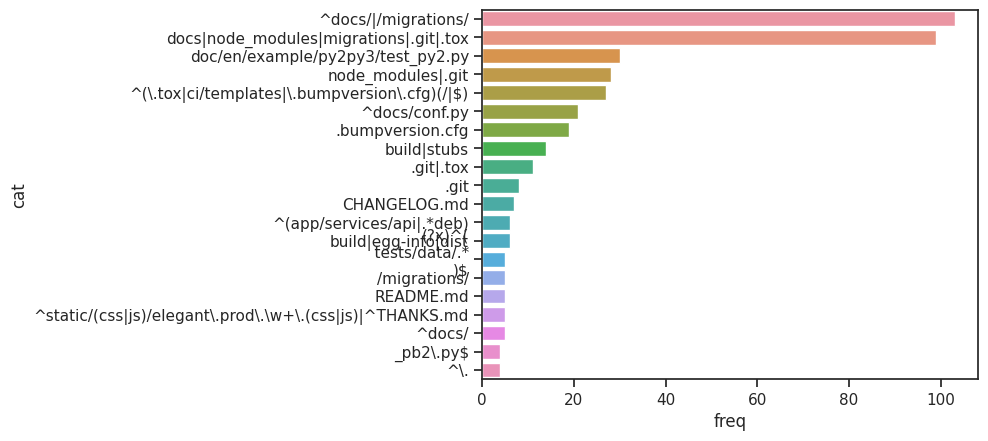

In [30]:
tmp_df = pd.Series(excludes).value_counts().head(20)
tmp_df = tmp_df.reset_index()
tmp_df.columns = ['cat', 'freq']
sns.barplot(y = 'cat', x = 'freq', data = tmp_df, orient = 'h')

<Axes: ylabel='Count'>

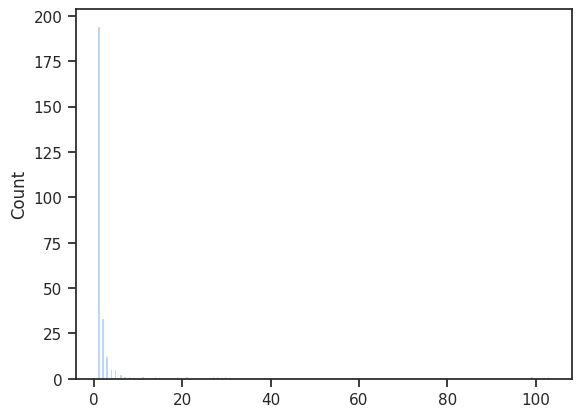

In [31]:
sns.histplot(pd.Series(excludes).value_counts().values)

## fail_fast
From https://pre-commit.com/#top_level-files: set to true to have pre-commit stop running hooks after the first failure. Default is false.

### Results
4.37% (405) of projects define this top level feature. However, only 2.51% (233) define unique behavior (setting it to True). Failing fast does not appear to be correlated with more hooks.

In [32]:
df[df['fail_fast_count'] > 0].shape[0]

405

In [33]:
df[df['fail_fast_count'] > 0].shape[0]/df.shape[0]

0.043731778425655975

In [34]:
c = 0
for y in df[df['fail_fast_count'] > 0]['raw_yaml']:
    if y['fail_fast']:
        c += 1;
c

233

In [35]:
c/df.shape[0]

0.02515927005722924

In [36]:
true_indices = []
for i,y in df[df['fail_fast_count'] > 0].iterrows():
    if y['raw_yaml']['fail_fast']:
        true_indices.append(i)

In [37]:
df.loc[true_indices,:]['total_hooks'].apply(len).describe()

count    233.000000
mean       5.888412
std        3.884706
min        1.000000
25%        3.000000
50%        6.000000
75%        7.000000
max       24.000000
Name: total_hooks, dtype: float64

In [38]:
df['total_hooks'].apply(len).describe()

count    9261.000000
mean        5.299212
std         3.985501
min         1.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        24.000000
Name: total_hooks, dtype: float64